In [1]:
# Импорт осн. библиотек
import pandas as pd
import numpy as np

# Для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля визуализаций
sns.set(style='whitegrid')
%matplotlib inline

In [2]:
# Загру. данных с историей просмотров пользователей с известными цель. переменными
train_events = pd.read_csv('train_events.csv')

# Загр .целевых переменных
train_targets = pd.read_csv('train_targets.csv')

# Загр.  данных с информацией о видео
video_info = pd.read_csv('video_info_v2.csv')

# Загр. данных с историей просмотров всех пользователей (для тестовой выборки)
all_events = pd.read_csv('all_events.csv')


In [3]:
# Просмотр первых 5 строк train_events
print('train_events shape:', train_events.shape)
train_events.head()


train_events shape: (1759616, 9)


,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976


In [4]:
# Просмотр первых 5 строк train_targets
print('train_targets shape:', train_targets.shape)
train_targets.head()


train_targets shape: (180012, 4)


,viewer_uid,age,sex,age_class
0,10087154,30,male,1
1,10908708,25,female,1
2,10190464,34,male,2
3,10939673,25,male,1
4,10288257,48,male,3


In [5]:
# Просмотр первых 5 строк video_info
print('video_info shape:', video_info.shape)
video_info.head()


video_info shape: (481480, 5)


,rutube_video_id,title,category,duration,author_id
0,video_185549,Как собрать букет из мыльных тюльпанов - Силик...,Хобби,1559160,1015054
1,video_111035,"Осторожно, Киберземляне!, 1 сезон, 12 серия",Сериалы,1320007,1002180
2,video_476517,ПОПУЛЯРНЫЕ ВИДЕОИГРЫ в LEGO... перевод - TD BR...,Хобби,606145,1095337
3,video_157198,"Хороший лжец (фильм, 2019)",Фильмы,6577440,1043618
4,video_289824,Нашего старого гнобят по-всякому,Развлечения,859493,1009535


In [6]:
# Информация о train_events
train_events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759616 entries, 0 to 1759615
Data columns (total 9 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   event_timestamp  object
 1   region           object
 2   ua_device_type   object
 3   ua_client_type   object
 4   ua_os            object
 5   ua_client_name   object
 6   total_watchtime  int64 
 7   rutube_video_id  object
 8   viewer_uid       int64 
dtypes: int64(2), object(7)
memory usage: 120.8+ MB


In [7]:
# Информация о train_targets
train_targets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180012 entries, 0 to 180011
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   viewer_uid  180012 non-null  int64 
 1   age         180012 non-null  int64 
 2   sex         180012 non-null  object
 3   age_class   180012 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.5+ MB


In [8]:
# Информация о video_info
video_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481480 entries, 0 to 481479
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   rutube_video_id  481480 non-null  object
 1   title            481480 non-null  object
 2   category         481480 non-null  object
 3   duration         481480 non-null  int64 
 4   author_id        481480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 18.4+ MB


In [9]:
# Пропущенные значения в train_events
train_events.isnull().sum()


event_timestamp         0
region                  0
ua_device_type          0
ua_client_type          0
ua_os              117671
ua_client_name          0
total_watchtime         0
rutube_video_id         0
viewer_uid              0
dtype: int64

In [10]:
# Пропущенные значения в train_targets
train_targets.isnull().sum()


viewer_uid    0
age           0
sex           0
age_class     0
dtype: int64

In [11]:
# Пропущенные значения в video_info
video_info.isnull().sum()

rutube_video_id    0
title              0
category           0
duration           0
author_id          0
dtype: int64

In [12]:
# Общее количество записей
total_entries = train_events.shape[0]

# Количество пропущенных значений в 'ua_os'
missing_entries = train_events['ua_os'].isnull().sum()

# Доля пропущенных значений
missing_ratio = missing_entries / total_entries

print(f"Доля пропущенных значений в 'ua_os': {missing_ratio:.2%}")

Доля пропущенных значений в 'ua_os': 6.69%


In [13]:
# Фильтруем строки, где 'ua_os' имеет пропущенные значения
missing_ua_os_data = train_events[train_events['ua_os'].isnull()]

# Выводим первые 20 строк
missing_ua_os_data.head(40)


,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid
20,2024-06-01 06:33:43+03:00,Tatarstan Republic,smartphone,mobile app,NaN,Rutube,2443,video_93106,10097927
30,2024-06-01 09:25:18+03:00,Sakha,smartphone,mobile app,NaN,Rutube,3111,video_228468,10211761
34,2024-06-01 17:09:14+03:00,Moscow,smartphone,mobile app,NaN,Rutube,2285,video_60498,10306496
52,2024-06-01 14:08:37+03:00,St.-Petersburg,smartphone,mobile app,NaN,Rutube,1420,video_97897,10511293
81,2024-06-01 19:00:13+03:00,Ulyanovsk,smartphone,mobile app,NaN,Rutube,1332,video_92467,10199771
112,2024-06-01 22:18:49+03:00,Vladimir Oblast,smartphone,mobile app,NaN,Rutube,1555,video_449223,10020648
131,2024-06-01 23:03:58+03:00,Stavropol Kray,smartphone,mobile app,NaN,Rutube,3350,video_138719,10022719
143,2024-06-01 16:24:57+03:00,Moscow,smartphone,mobile app,NaN,Rutube,6045,video_382403,10167397
151,2024-06-01 09:18:03+03:00,Sakha,smartphone,mobile app,NaN,Rutube,390,video_198949,10211761
153,2024-06-01 05:31:04+03:00,Sverdlovsk Oblast,smartphone,mobile app,NaN,Rutube,2043,video_61152,10033018


In [14]:
# Распределение 'ua_device_type' среди записей с пропущенным 'ua_os'
device_type_counts = missing_ua_os_data['ua_device_type'].value_counts()
print("Распределение 'ua_device_type' при пропущенном 'ua_os':")
print(device_type_counts)

# Распределение 'ua_client_type' среди записей с пропущенным 'ua_os'
client_type_counts = missing_ua_os_data['ua_client_type'].value_counts()
print("\nРаспределение 'ua_client_type' при пропущенном 'ua_os':")
print(client_type_counts)



Распределение 'ua_device_type' при пропущенном 'ua_os':
smartphone    98030
tablet        19641
Name: ua_device_type, dtype: int64

Распределение 'ua_client_type' при пропущенном 'ua_os':
mobile app    117671
Name: ua_client_type, dtype: int64


In [15]:
# Объединяем train_events с train_targets по 'viewer_uid'
train_data = train_events.merge(train_targets, on='viewer_uid')

# Объединяем полученный train_data с video_info по 'rutube_video_id'
train_data = train_data.merge(video_info, on='rutube_video_id', how='left')

# Проверяем результат объединения
print('train_data shape:', train_data.shape)
train_data.head()



train_data shape: (1759616, 16)


,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,age,sex,age_class,title,category,duration,author_id
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,20,female,0,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219
1,2024-06-01 06:10:14+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,851,video_61152,10067243,20,female,0,День защиты детей. Мужское / Женское. Выпуск о...,Телепередачи,2465238,1009219
2,2024-06-02 06:15:07+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,5516,video_96775,10067243,20,female,0,"Новая Битва экстрасенсов, 24 сезон, 11 выпуск",Телепередачи,5518280,1009257
3,2024-06-03 17:35:40+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,3615,video_402535,10067243,20,female,0,Свадьба башкирских стиляг VS Свадьба в стиле бохо,Телепередачи,6094560,1002256
4,2024-06-05 19:20:33+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,6144,video_180483,10067243,20,female,0,Мультфильм История игрушек: Большой побег I To...,Фильмы,6183359,1056700


In [16]:
# Создаем признак 'ua_os_missing' перед заполнением пропусков
train_data['ua_os_missing'] = train_data['ua_os'].isnull().astype(int)


In [17]:
# Заполняем пропуски значением 'Unknown'
train_data['ua_os'] = train_data['ua_os'].fillna('Unknown')



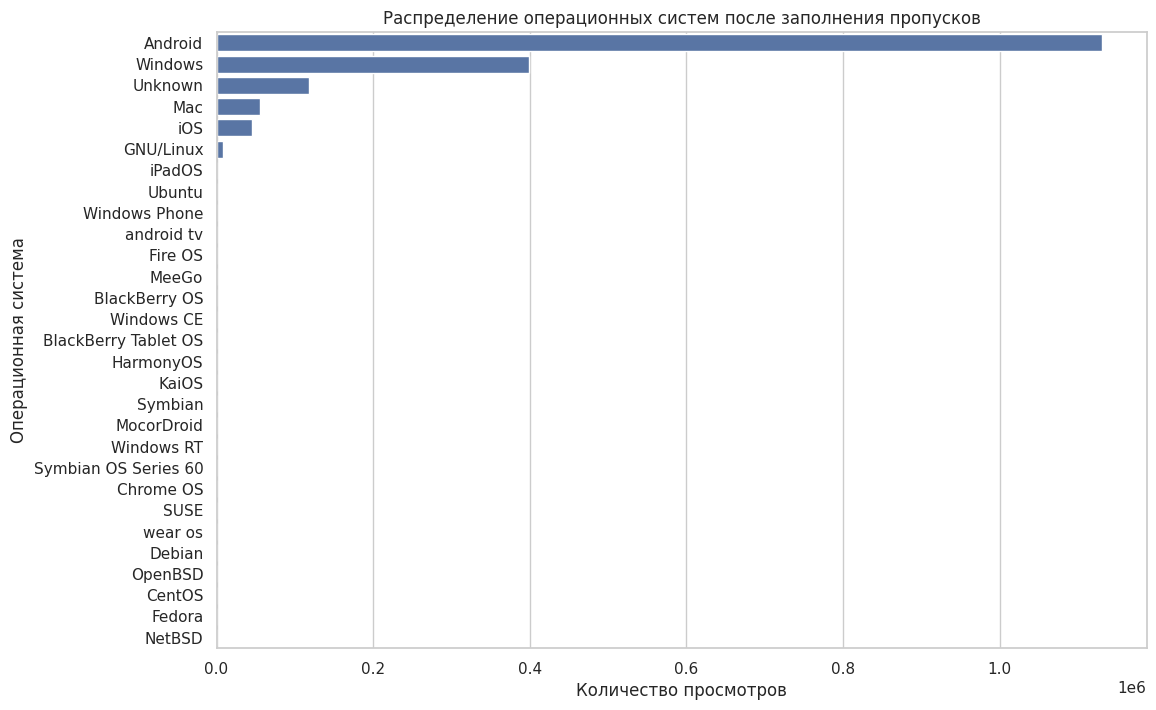

In [18]:
#  Визуализация распределения 'ua_os' после заполнения
plt.figure(figsize=(12, 8))
sns.countplot(data=train_data, y='ua_os', order=train_data['ua_os'].value_counts().index)
plt.title('Распределение операционных систем после заполнения пропусков')
plt.xlabel('Количество просмотров')
plt.ylabel('Операционная система')
plt.show()

In [19]:
#  Кодирование признака 'ua_os'
unique_os = train_data['ua_os'].nunique()
print(f"Количество уникальных операционных систем: {unique_os}")

if unique_os < 10:
    # One-Hot Encoding
    train_data = pd.get_dummies(train_data, columns=['ua_os'], prefix='ua_os')
else:
    # Label Encoding
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    train_data['ua_os_encoded'] = le.fit_transform(train_data['ua_os'].astype(str))

Количество уникальных операционных систем: 29


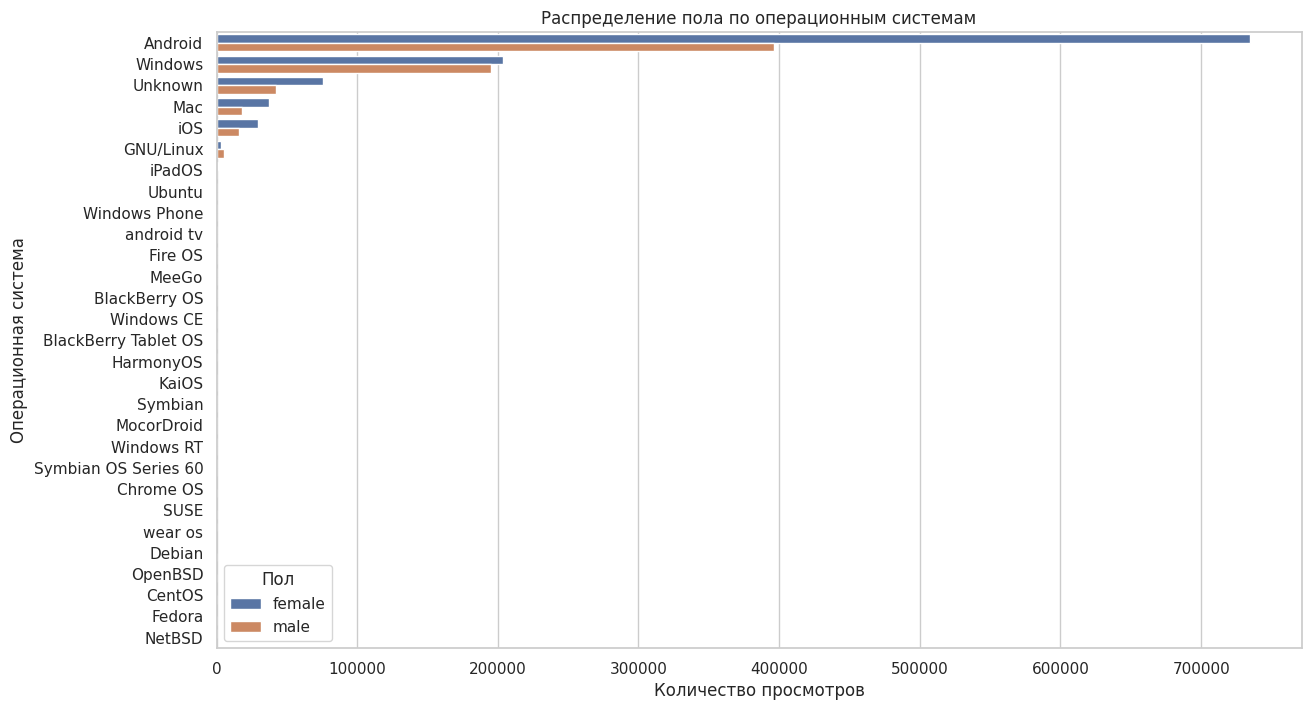

In [20]:
#  Анализ распределения пола по 'ua_os'
plt.figure(figsize=(14, 8))
sns.countplot(data=train_data, y='ua_os', hue='sex', order=train_data['ua_os'].value_counts().index)
plt.title('Распределение пола по операционным системам')
plt.xlabel('Количество просмотров')
plt.ylabel('Операционная система')
plt.legend(title='Пол')
plt.show()

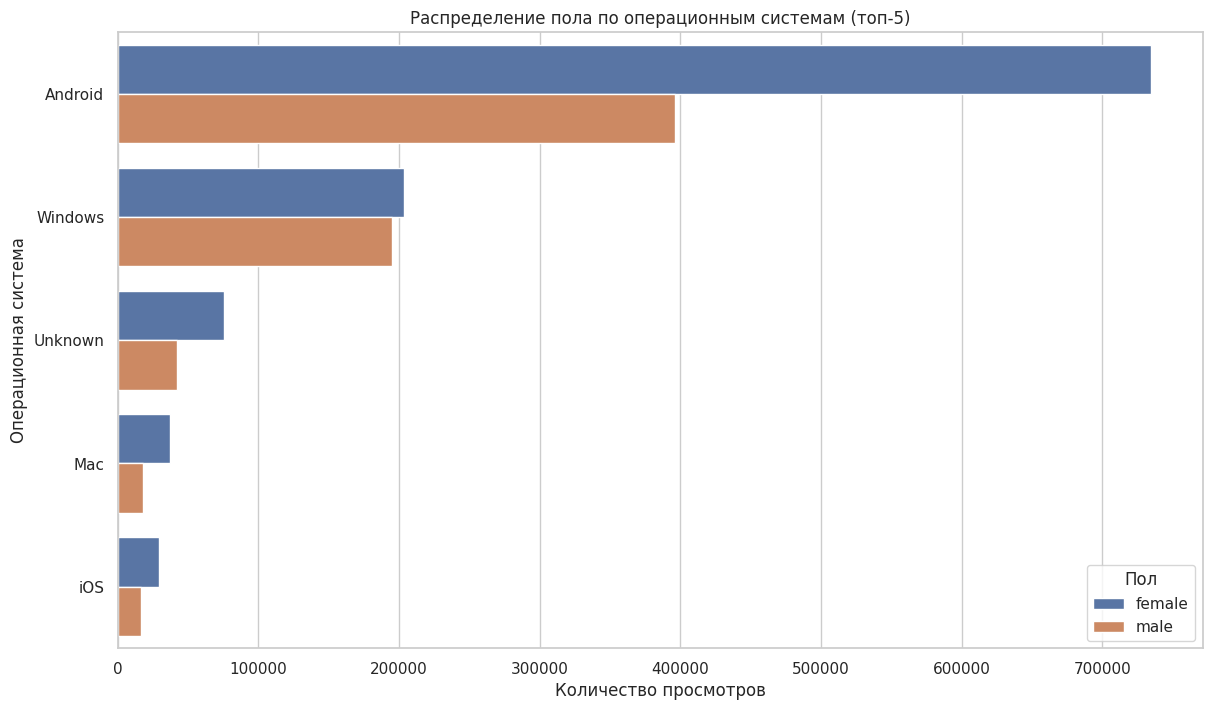

In [21]:
top_5_os = train_data['ua_os'].value_counts().index[:5]  # Получаем топ-5 операционных систем

# Строим график только для этих 5 операционных систем
plt.figure(figsize=(14, 8))
sns.countplot(data=train_data[train_data['ua_os'].isin(top_5_os)], 
              y='ua_os', hue='sex', 
              order=top_5_os)  # Указываем порядок на основе топ-5 ОС

plt.title('Распределение пола по операционным системам (топ-5)')
plt.xlabel('Количество просмотров')
plt.ylabel('Операционная система')
plt.legend(title='Пол')
plt.show()

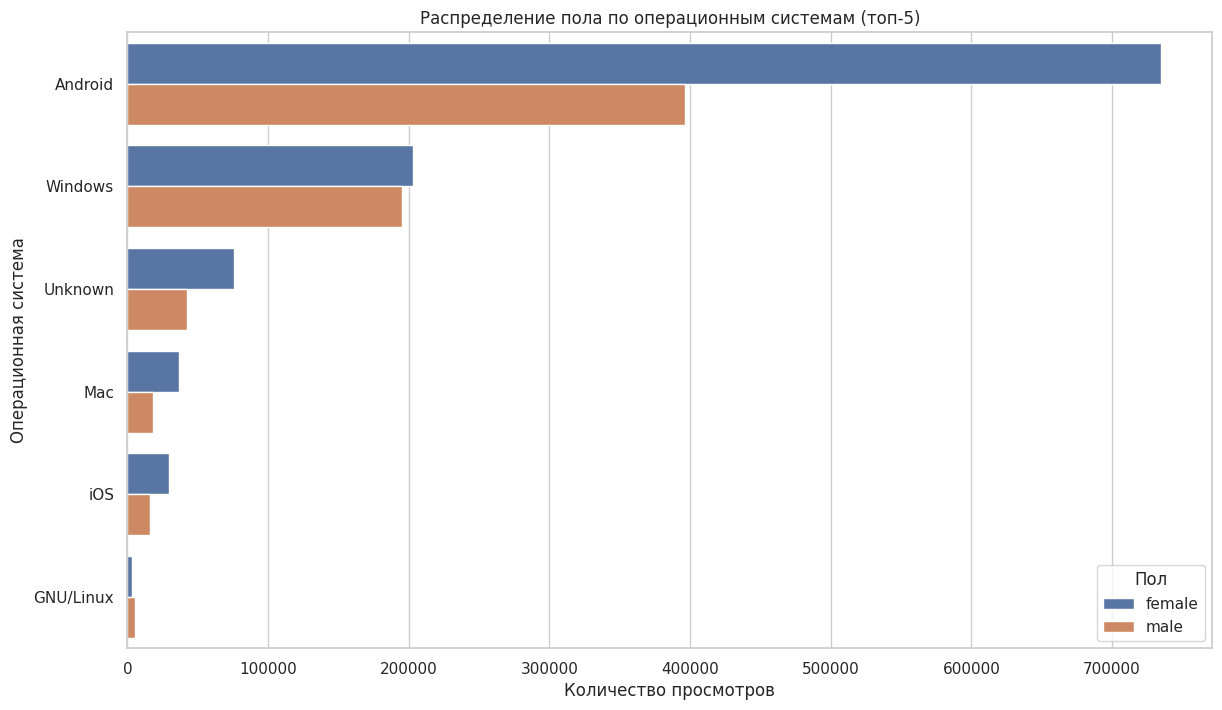

In [22]:
top_6_os = train_data['ua_os'].value_counts().index[:6]  # Получаем топ-5 операционных систем

# Строим график только для этих 6 операционных систем
plt.figure(figsize=(14, 8))
sns.countplot(data=train_data[train_data['ua_os'].isin(top_6_os)], 
              y='ua_os', hue='sex', 
              order=top_6_os)  # Указываем порядок на основе топ-6 ОС

plt.title('Распределение пола по операционным системам (топ-5)')
plt.xlabel('Количество просмотров')
plt.ylabel('Операционная система')
plt.legend(title='Пол')
plt.show()

In [23]:
# Просмотр всех столбцов в train_data
print("Список столбцов в train_data:")
print(train_data.columns.tolist())


Список столбцов в train_data:
['event_timestamp', 'region', 'ua_device_type', 'ua_client_type', 'ua_os', 'ua_client_name', 'total_watchtime', 'rutube_video_id', 'viewer_uid', 'age', 'sex', 'age_class', 'title', 'category', 'duration', 'author_id', 'ua_os_missing', 'ua_os_encoded']


In [24]:
# Проверяем, существует ли столбец 'age_range'
if 'age_range' not in train_data.columns:
    # Создаем отображение для возрастных классов
    age_class_mapping = {
        0: '9-20',
        1: '21-30',
        2: '31-40',
        3: '41-60'
    }
    
    # Применяем отображение к столбцу 'age_class' и создаем новый столбец 'age_range'
    train_data['age_range'] = train_data['age_class'].map(age_class_mapping)
    
    print("Столбец 'age_range' успешно добавлен.")
else:
    print("Столбец 'age_range' уже существует в train_data.")


Столбец 'age_range' успешно добавлен.


In [25]:
# Просмотр первых 5 строк train_data для проверки
train_data[['age_class', 'age_range']].head()


,age_class,age_range
0,0,9-20
1,0,9-20
2,0,9-20
3,0,9-20
4,0,9-20


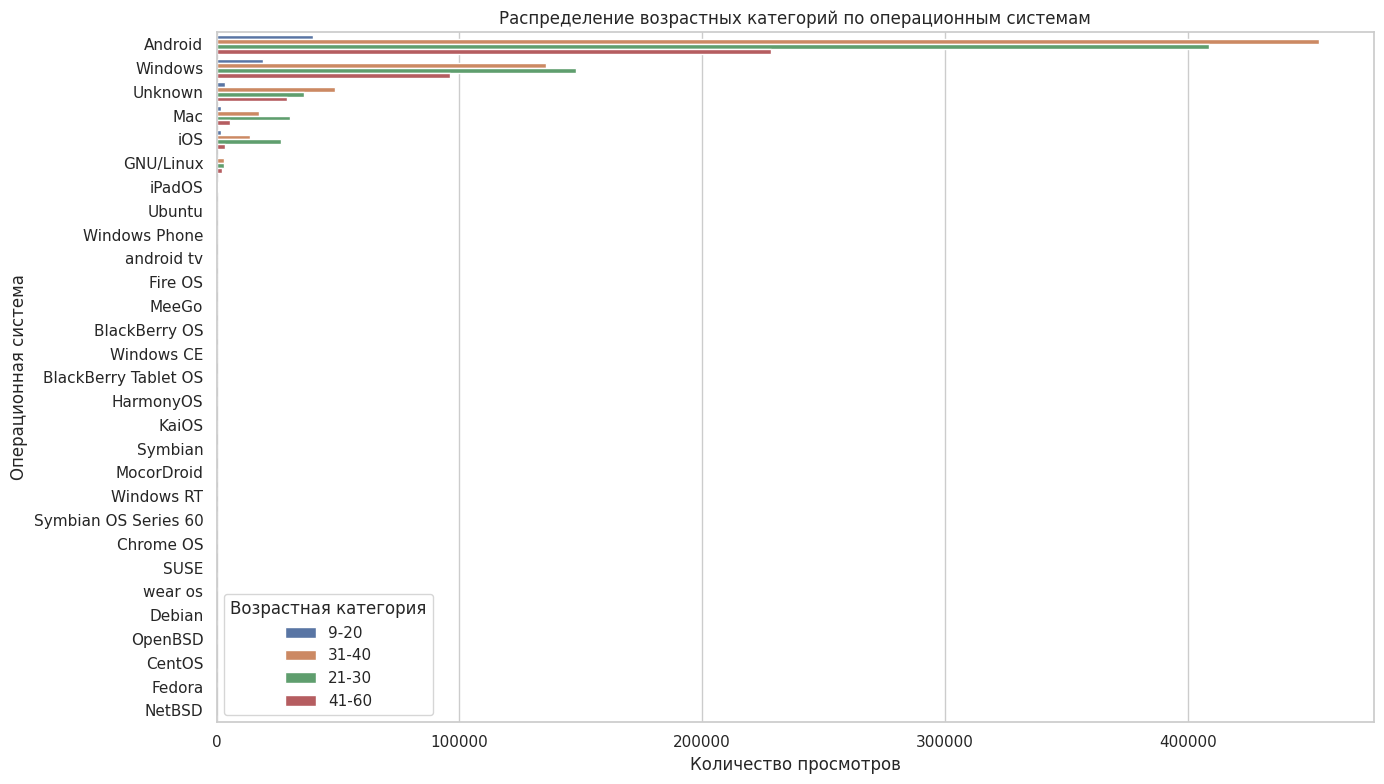

In [26]:
# Анализ распределения возрастных категорий по 'ua_os'
plt.figure(figsize=(14, 8))
sns.countplot(
    data=train_data,
    y='ua_os',
    hue='age_range',
    order=train_data['ua_os'].value_counts().index
)
plt.title('Распределение возрастных категорий по операционным системам')
plt.xlabel('Количество просмотров')
plt.ylabel('Операционная система')
plt.legend(title='Возрастная категория')
plt.tight_layout()
plt.show()


In [27]:
# Определяем топ-6 операционных систем по количеству просмотров
top_6_os = train_data['ua_os'].value_counts().nlargest(6).index
print("Топ-6 операционных систем:")
print(top_6_os)
# Фильтруем данные, оставляя только топ-6 ОС
top_os_data = train_data[train_data['ua_os'].isin(top_6_os)]
print(f"Количество записей после фильтрации: {top_os_data.shape[0]}")


Топ-6 операционных систем:
Index(['Android', 'Windows', 'Unknown', 'Mac', 'iOS', 'GNU/Linux'], dtype='object')
Количество записей после фильтрации: 1756968


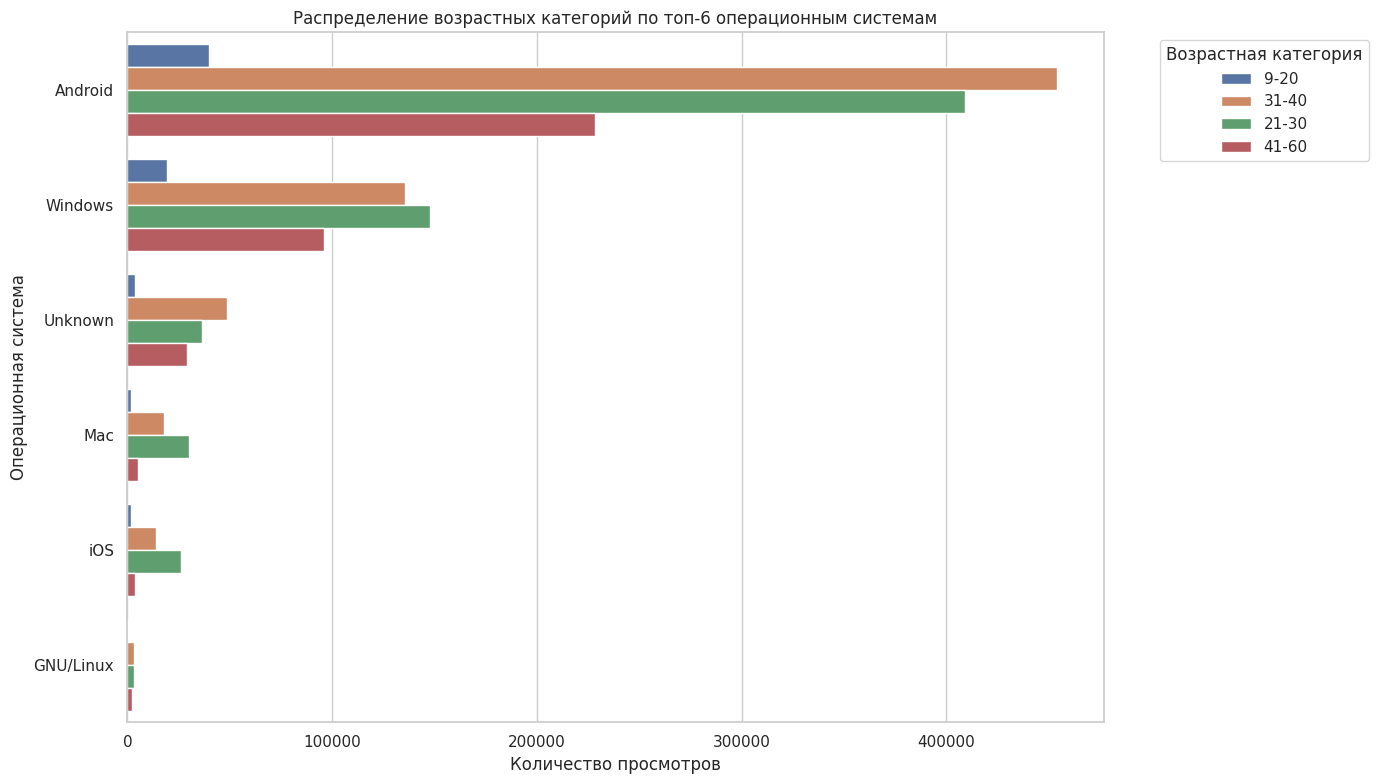

In [28]:
# Анализ распределения возрастных категорий по топ-6 ОС
plt.figure(figsize=(14, 8))
sns.countplot(
    data=top_os_data,
    y='ua_os',
    hue='age_range',
    order=top_os_data['ua_os'].value_counts().index
)
plt.title('Распределение возрастных категорий по топ-6 операционным системам')
plt.xlabel('Количество просмотров')
plt.ylabel('Операционная система')
plt.legend(title='Возрастная категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


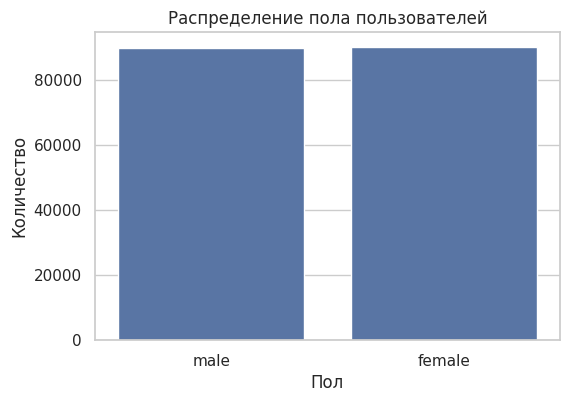

In [29]:
# Распределение пола пользователей
plt.figure(figsize=(6, 4))
sns.countplot(data=train_targets, x='sex')
plt.title('Распределение пола пользователей')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()


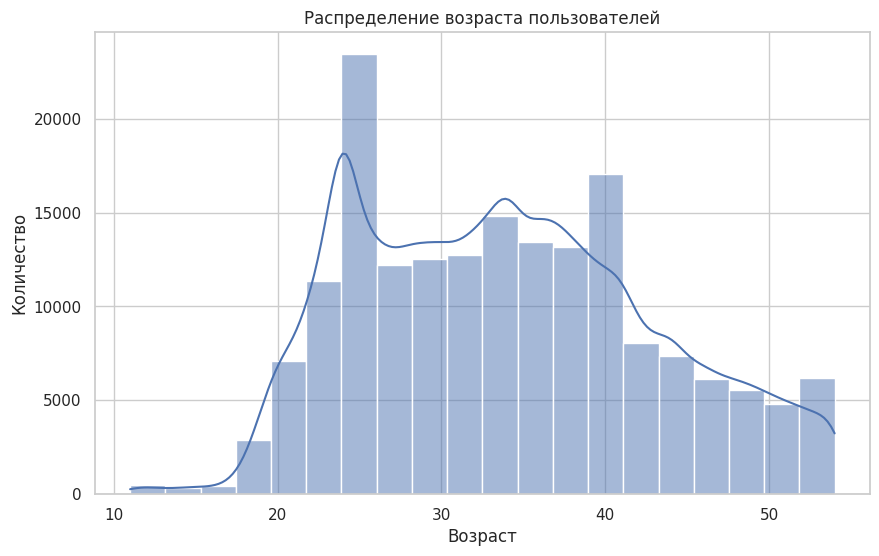

In [30]:
# Распределение возраста пользователей
plt.figure(figsize=(10, 6))
sns.histplot(data=train_targets, x='age', bins=20, kde=True)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()


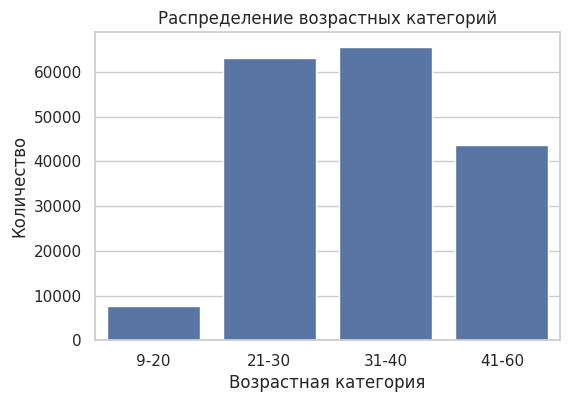

In [31]:
# Добавляем метки возрастных категорий
age_class_mapping = {
    0: '9-20',
    1: '21-30',
    2: '31-40',
    3: '41-60'
}
train_targets['age_range'] = train_targets['age_class'].map(age_class_mapping)

# Распределение возрастных категорий
plt.figure(figsize=(6, 4))
sns.countplot(data=train_targets, x='age_range', order=['9-20', '21-30', '31-40', '41-60'])
plt.title('Распределение возрастных категорий')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество')
plt.show()


In [32]:
# Преобразуем 'event_timestamp' в формат datetime
train_events['event_timestamp'] = pd.to_datetime(train_events['event_timestamp'])


In [33]:
# Словарь регионов и их смещений относительно московского времени (в часах)
region_timezone_offset = {
    'Adygeya Republic': 0,
'Altai': +4,
'Altay Kray': +4,
'Amur Oblast': +6,
'Arkhangelsk Oblast': 0,
'Arkhangelskaya': 0,
'Astrakhan': 0,
'Astrakhan Oblast': 0,
'Bashkortostan Republic': +2,
'Belgorod Oblast': 0,
'Bryansk Oblast': 0,
'Buryatiya Republic': +5,
'Chechnya': 0,
'Chelyabinsk': +2,
'Chukotka': +9,
'Chuvashia': 0,
'Crimea': 0,
'Dagestan': 0,
'Ingushetiya Republic': 0,
'Irkutsk Oblast': +5,
'Ivanovo': 0,
'Ivanovo Oblast': 0,
'Jaroslavl': 0,
'Jewish Autonomous Oblast': +5,
'Kabardino-Balkariya Republic': 0,
'Kaliningrad': -1,
'Kaliningrad Oblast': -1,
'Kalmykiya Republic': 0,
'Kaluga': 0,
'Kaluga Oblast': 0,
'Kamchatka': +9,
'Karachayevo-Cherkesiya Republic': 0,
'Karelia': 0,
'Kemerovo Oblast': +4,
'Khabarovsk': +6,
'Khakasiya Republic': +4,
'Khanty-Mansia': +2,
'Kirov': 0,
'Kirov Oblast': 0,
'Komi': 0,
'Kostroma Oblast': 0,
'Krasnodar Krai': 0,
'Krasnodarskiy': 0,
'Krasnoyarsk Krai': +4,
'Krasnoyarskiy': +4,
'Kurgan Oblast': +2,
'Kursk': 0,
'Kursk Oblast': 0,
'Kuzbass': +4,
'Leningradskaya Oblast': 0,
'Lipetsk Oblast': 0,
'Magadan Oblast': +8,
'Mariy-El Republic': 0,
'Mordoviya Republic': 0,
'Moscow': 0,
'Moscow Oblast': 0,
'Murmansk': 0,
'Nenets': 0,
'Nizhny Novgorod Oblast': 0,
'North Ossetia': 0,
'North Ossetia–Alania': 0,
'Novgorod Oblast': 0,
'Novosibirsk Oblast': +4,
'Omsk': +3,
'Omsk Oblast': +3,
'Orel Oblast': 0,
'Orenburg Oblast': +2,
'Oryol oblast': 0,
'Penza': 0,
'Penza Oblast': 0,
'Perm': +2,
'Perm Krai': +2,
'Primorskiy (Maritime) Kray': +7,
'Primorye': +7,
'Pskov Oblast': 0,
'Rostov': 0,
'Ryazan Oblast': 0,
'Sakha': +6,
'Sakhalin Oblast': +8,
'Samara Oblast': +1,
'Saratov Oblast': 0,
'Saratovskaya Oblast': +1,
'Sebastopol City': 0,
'Smolensk': 0,
'Smolensk Oblast': 0,
'Smolenskaya Oblast': 0,
'St.-Petersburg': 0,
'Stavropol Krai': 0,
'Stavropol Kray': 0,
'Stavropol’ Kray': 0,
'Sverdlovsk': +2,
'Sverdlovsk Oblast': +2,
'Tambov': 0,
'Tambov Oblast': 0,
'Tatarstan Republic': 0,
'Tomsk Oblast': +4,
'Transbaikal Territory': +5,
'Tula': 0,
'Tula Oblast': 0,
'Tver Oblast': 0,
'Tver’ Oblast': 0,
'Tyumen Oblast': +2,
'Tyumen’ Oblast': +2,
'Tyva Republic': +4,
'Udmurtiya Republic': +2,
'Ulyanovsk': 0,
'Vladimir': 0,
'Vladimir Oblast': 0,
'Volgograd Oblast': 0,
'Vologda': 0,
'Vologda Oblast': 0,
'Voronezh Oblast': 0,
'Voronezj': 0,
'Yamalo-Nenets': +2,
'Yaroslavl Oblast': 0,
'Zabaykalskiy (Transbaikal) Kray': +6
}

In [34]:
# Создаем Series с смещениями
train_events['timezone_offset'] = train_events['region'].map(region_timezone_offset).fillna(0)

# Преобразуем смещения в Timedelta
train_events['timezone_offset'] = pd.to_timedelta(train_events['timezone_offset'], unit='h')

# Корректируем временные метки
train_events['event_timestamp_local'] = train_events['event_timestamp'] + train_events['timezone_offset']


In [35]:
# Извлекаем час, день недели и месяц из локального времени
train_events['hour'] = train_events['event_timestamp_local'].dt.hour
train_events['day_of_week'] = train_events['event_timestamp_local'].dt.dayofweek  # 0 - Понедельник
train_events['month'] = train_events['event_timestamp_local'].dt.month


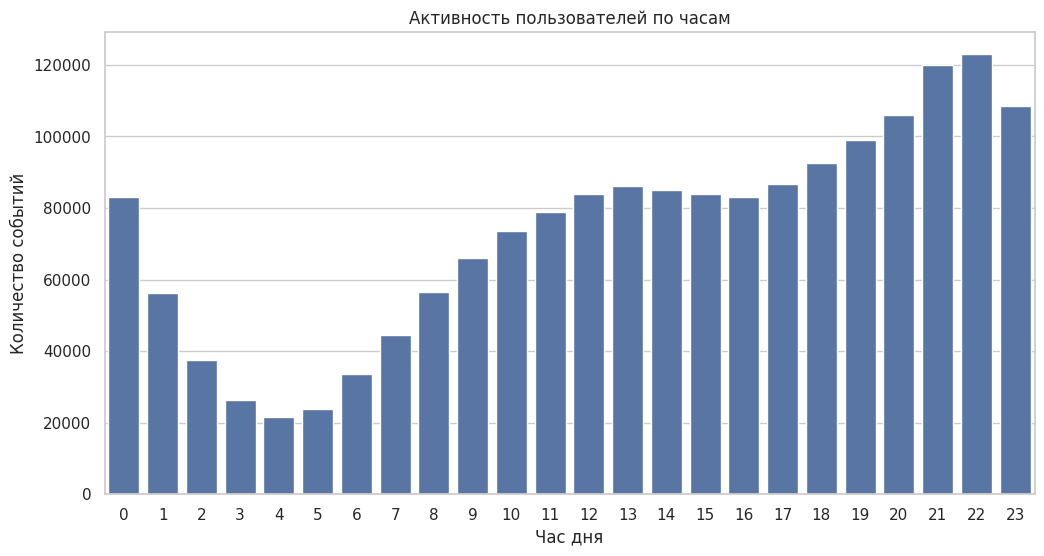

In [36]:
# Активность пользователей по часам
plt.figure(figsize=(12, 6))
sns.countplot(data=train_events, x='hour')
plt.title('Активность пользователей по часам')
plt.xlabel('Час дня')
plt.ylabel('Количество событий')
plt.show()


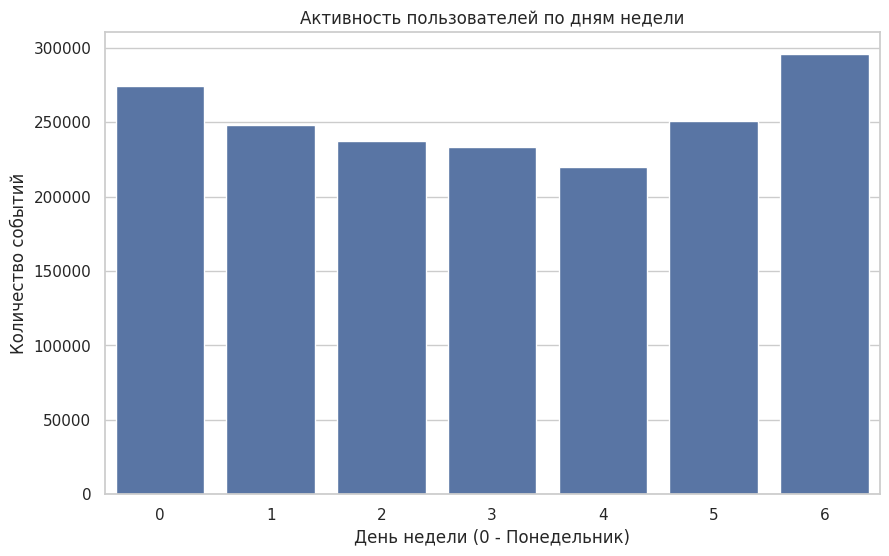

In [37]:
# Активность пользователей по дням недели
plt.figure(figsize=(10, 6))
sns.countplot(data=train_events, x='day_of_week')
plt.title('Активность пользователей по дням недели')
plt.xlabel('День недели (0 - Понедельник)')
plt.ylabel('Количество событий')
plt.show()


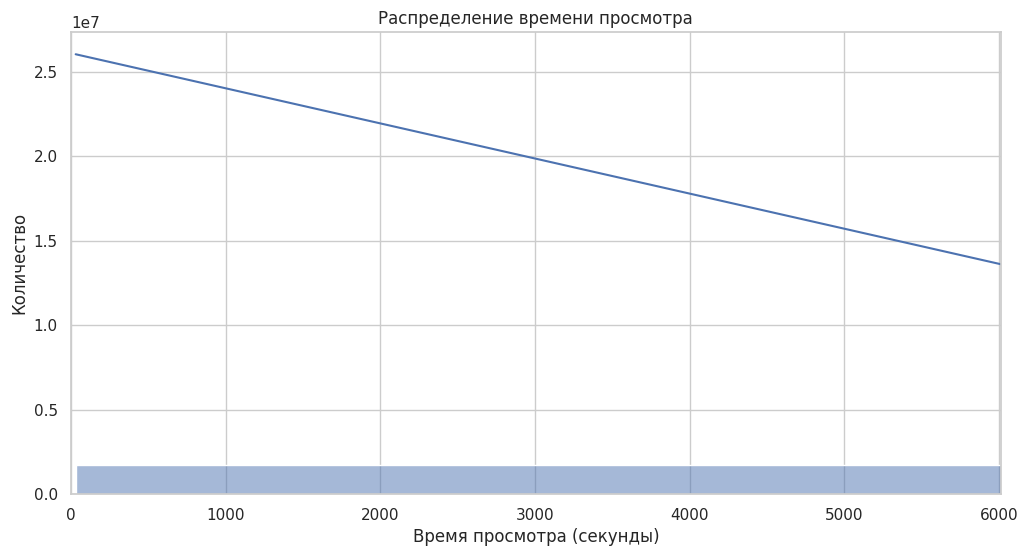

In [38]:
# Распределение времени просмотра
plt.figure(figsize=(12, 6))
sns.histplot(data=train_events, x='total_watchtime', bins=50, kde=True)
plt.title('Распределение времени просмотра')
plt.xlabel('Время просмотра (секунды)')
plt.ylabel('Количество')
# Ограничим ось X для наглядности
plt.xlim(0, train_events['total_watchtime'].quantile(0.95))
plt.show()


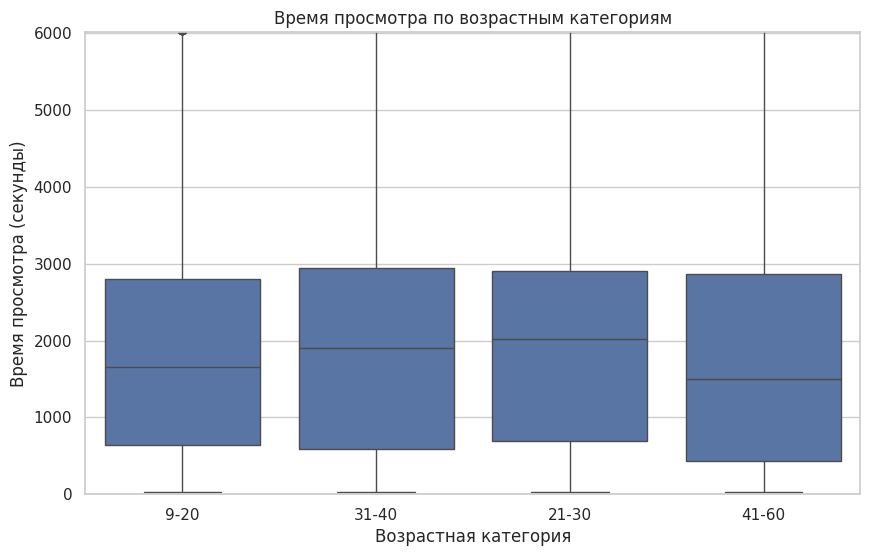

In [39]:
# Боксплот времени просмотра по возрастным категориям
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='age_range', y='total_watchtime')
plt.title('Время просмотра по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Время просмотра (секунды)')
# Ограничим ось Y для наглядности
plt.ylim(0, train_data['total_watchtime'].quantile(0.95))
plt.show()


In [40]:
# Проверка типа данных
print("Тип данных 'total_watchtime':", train_events['total_watchtime'].dtype)

# Проверка количества пропусков
missing_watchtime = train_events['total_watchtime'].isnull().sum()
print(f"Количество пропусков в 'total_watchtime': {missing_watchtime}")


Тип данных 'total_watchtime': int64
Количество пропусков в 'total_watchtime': 0


In [41]:
print(train_events['total_watchtime'].describe())


count    1.759616e+06
mean     2.203427e+03
std      4.027573e+03
min      3.100000e+01
25%      5.820000e+02
50%      1.859000e+03
75%      2.902000e+03
max      2.489070e+06
Name: total_watchtime, dtype: float64


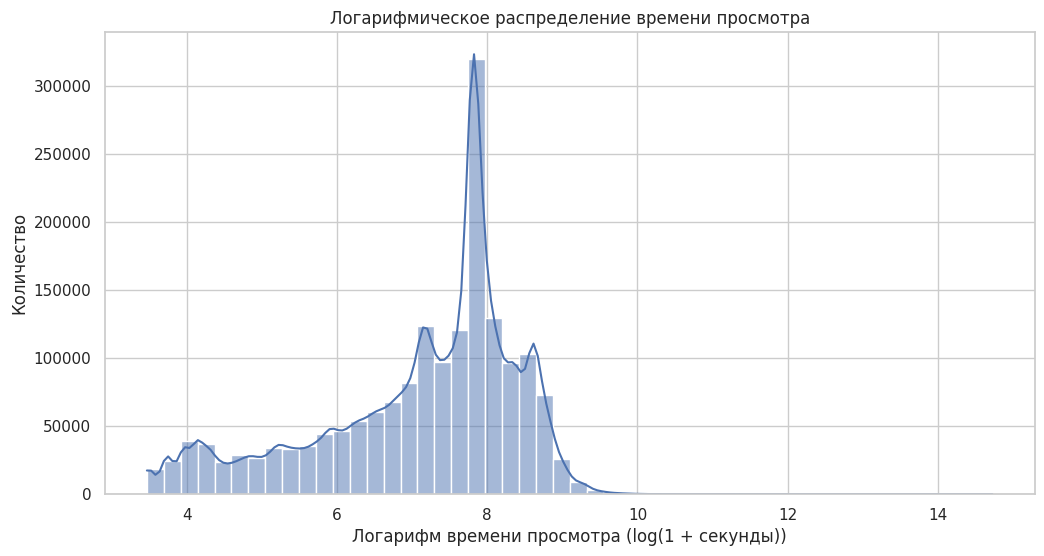

In [42]:
# Добавляем столбец с логарифмом времени просмотра
train_events['log_total_watchtime'] = np.log1p(train_events['total_watchtime'])  # log(1 + x)

# Визуализация логарифмически трансформированных данных
plt.figure(figsize=(12, 6))
sns.histplot(data=train_events, x='log_total_watchtime', bins=50, kde=True)
plt.title('Логарифмическое распределение времени просмотра')
plt.xlabel('Логарифм времени просмотра (log(1 + секунды))')
plt.ylabel('Количество')
plt.show()

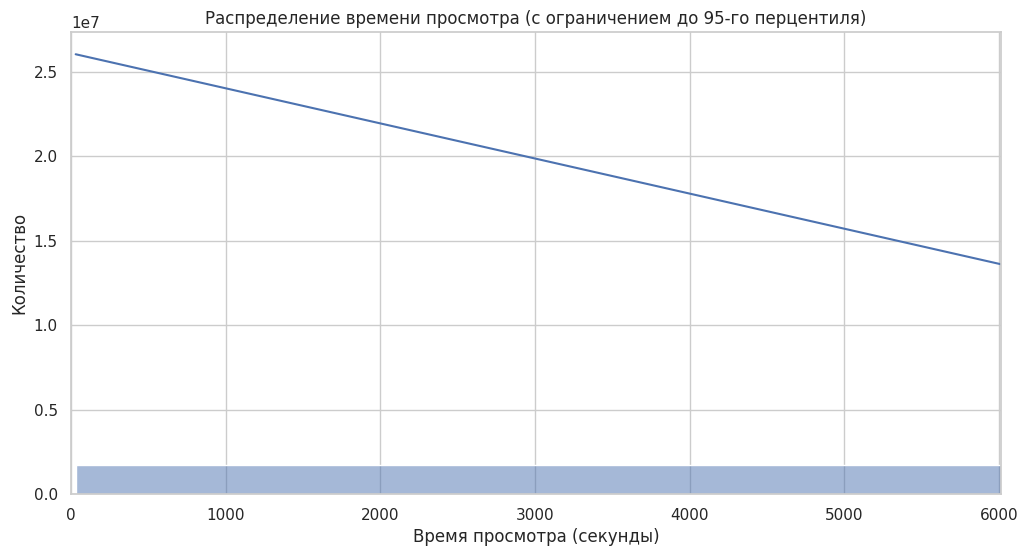

In [43]:
# Ограничение оси X до 95-го перцентиля
plt.figure(figsize=(12, 6))
sns.histplot(data=train_events, x='total_watchtime', bins=50, kde=True)
plt.title('Распределение времени просмотра (с ограничением до 95-го перцентиля)')
plt.xlabel('Время просмотра (секунды)')
plt.ylabel('Количество')
plt.xlim(0, train_events['total_watchtime'].quantile(0.95))
plt.show()


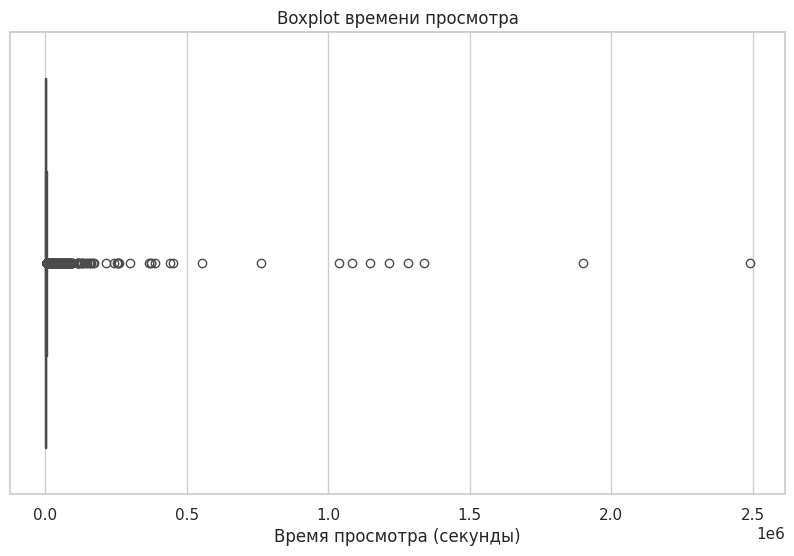

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_watchtime', data=train_events)
plt.title('Boxplot времени просмотра')
plt.xlabel('Время просмотра (секунды)')
plt.show()


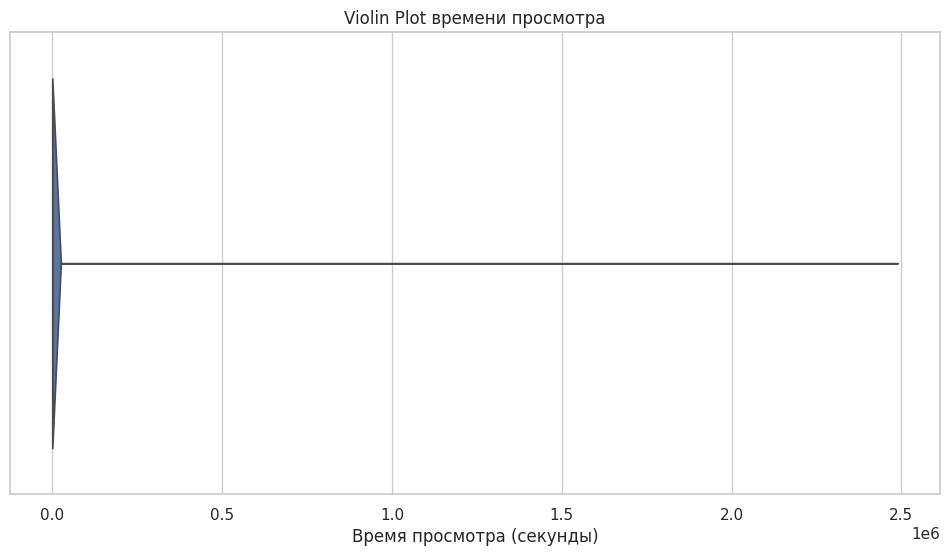

In [45]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='total_watchtime', data=train_events, inner='quartile')
plt.title('Violin Plot времени просмотра')
plt.xlabel('Время просмотра (секунды)')
plt.show()


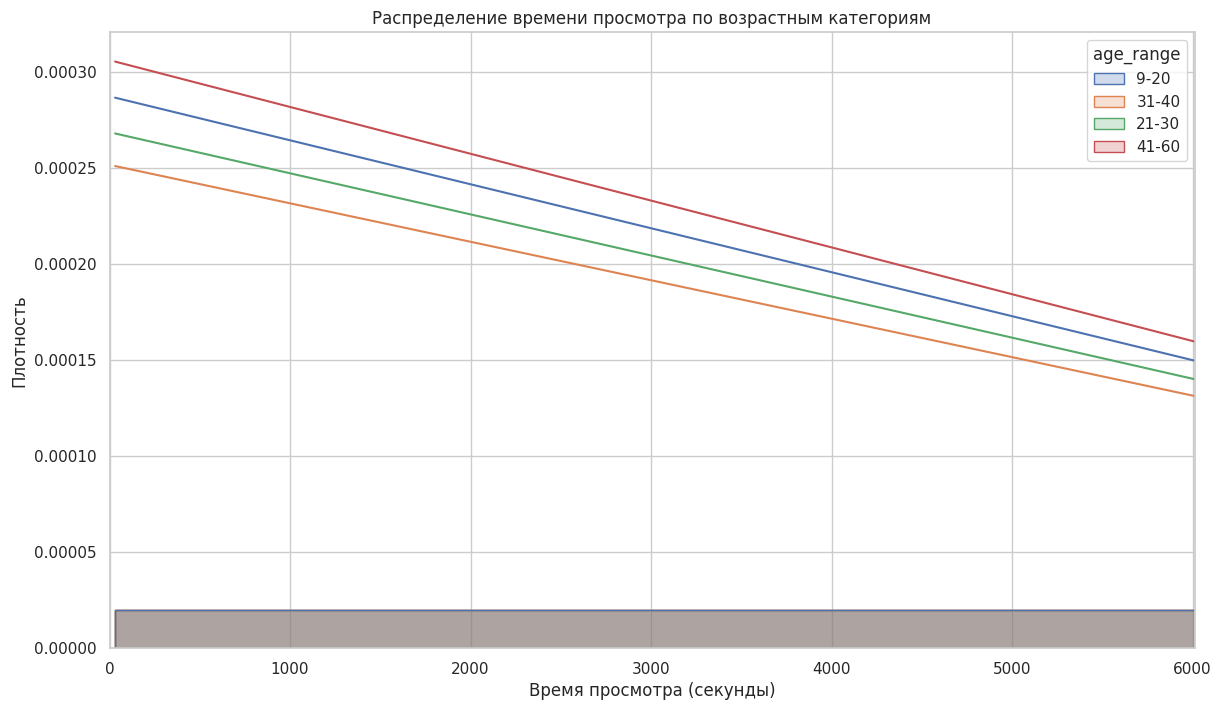

In [46]:
plt.figure(figsize=(14, 8))
sns.histplot(data=train_data, x='total_watchtime', bins=50, kde=True, hue='age_range', element='step', stat='density', common_norm=False)
plt.title('Распределение времени просмотра по возрастным категориям')
plt.xlabel('Время просмотра (секунды)')
plt.ylabel('Плотность')
plt.xlim(0, train_data['total_watchtime'].quantile(0.95))
plt.show()


In [47]:
# Определение 99-го перцентиля для выявления экстремальных выбросов
watchtime_99 = train_data['total_watchtime'].quantile(0.99)
print(f"99-й перцентиль времени просмотра: {watchtime_99} секунд")

# Фильтрация данных с временем просмотра выше 99-го перцентиля
extreme_watchtime = train_data[train_data['total_watchtime'] > watchtime_99]
print(f"Количество записей с временем просмотра выше 99-го перцентиля: {extreme_watchtime.shape[0]}")


99-й перцентиль времени просмотра: 8550.0 секунд
Количество записей с временем просмотра выше 99-го перцентиля: 17581


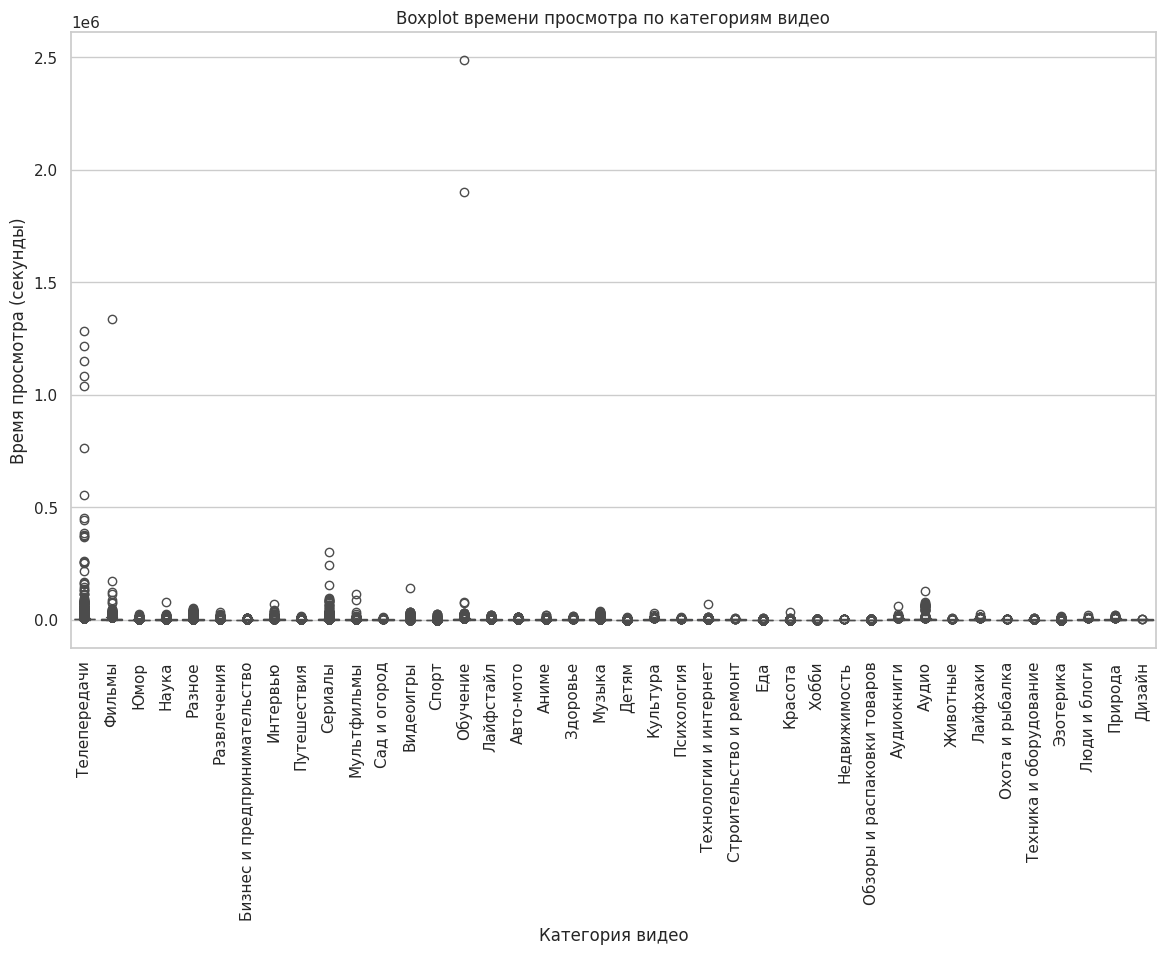

In [48]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='total_watchtime', data=train_data)
plt.title('Boxplot времени просмотра по категориям видео')
plt.xlabel('Категория видео')
plt.ylabel('Время просмотра (секунды)')
plt.xticks(rotation=90)
plt.show()


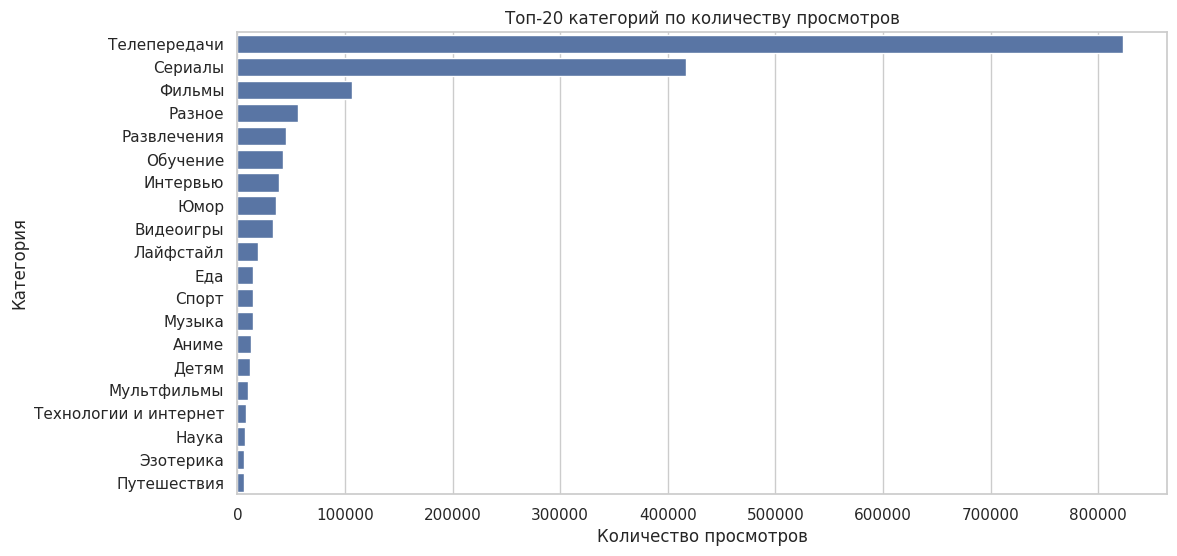

In [49]:
plt.figure(figsize=(12, 6))
category_counts = train_data['category'].value_counts().head(20)
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Топ-20 категорий по количеству просмотров')
plt.xlabel('Количество просмотров')
plt.ylabel('Категория')
plt.show()


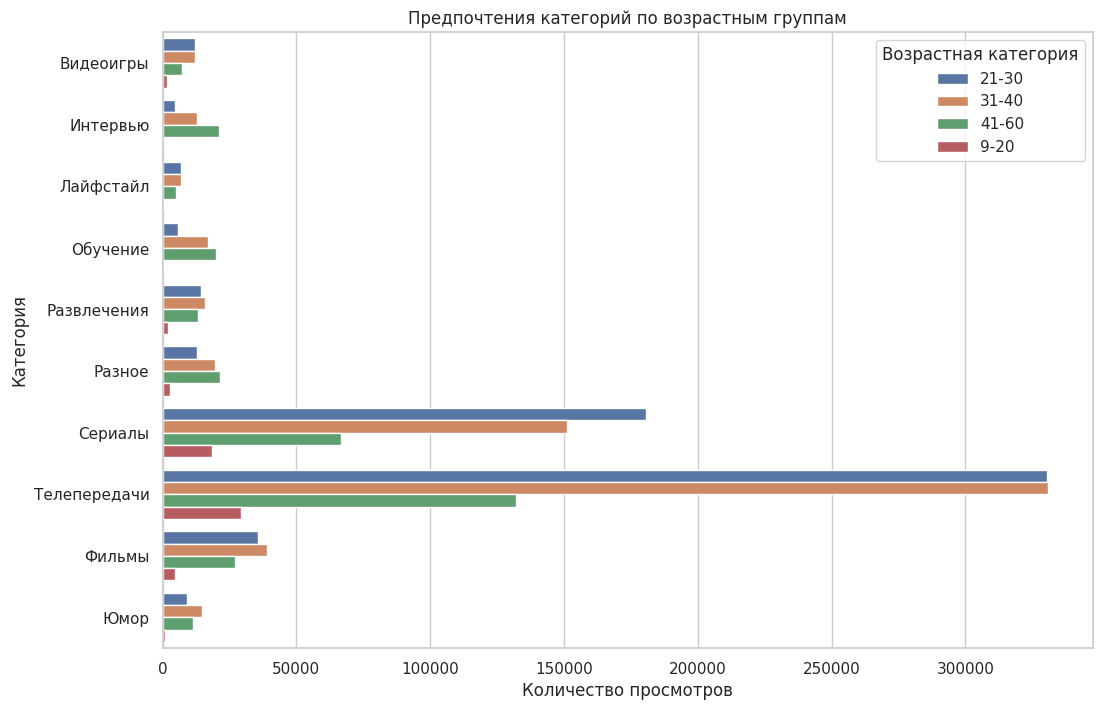

In [50]:
plt.figure(figsize=(12, 8))
category_age = train_data.groupby(['age_range', 'category']).size().reset_index(name='counts')
top_categories = train_data['category'].value_counts().head(10).index
category_age = category_age[category_age['category'].isin(top_categories)]
sns.barplot(data=category_age, x='counts', y='category', hue='age_range')
plt.title('Предпочтения категорий по возрастным группам')
plt.xlabel('Количество просмотров')
plt.ylabel('Категория')
plt.legend(title='Возрастная категория')
plt.show()


In [51]:
from sklearn.preprocessing import LabelEncoder

# Список категориальных признаков
categorical_features = ['region', 'ua_device_type', 'ua_client_type', 'ua_os', 'ua_client_name', 'category', 'age_range']

# Создаем копию данных
corr_data = train_data.copy()

# Кодируем категориальные признаки
le = LabelEncoder()
for col in categorical_features:
    corr_data[col] = le.fit_transform(corr_data[col].astype(str))


In [52]:
corr_matrix = corr_data.corr()


/tmp/ipykernel_257221/3345540992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_data.corr()


In [67]:
# sample_data = corr_data.sample(10000, random_state=42)

# sns.pairplot(sample_data, vars=['age', 'total_watchtime', 'hour', 'day_of_week'], hue='sex')
# plt.show()


In [54]:
# Проверка типов данных всех столбцов в corr_data
print(corr_data.dtypes)


event_timestamp    object
region              int64
ua_device_type      int64
ua_client_type      int64
ua_os               int64
ua_client_name      int64
total_watchtime     int64
rutube_video_id    object
viewer_uid          int64
age                 int64
sex                object
age_class           int64
title              object
category            int64
duration            int64
author_id           int64
ua_os_missing       int64
ua_os_encoded       int64
age_range           int64
dtype: object


In [55]:
# Преобразуем 'event_timestamp' в тип datetime
train_data['event_timestamp'] = pd.to_datetime(train_data['event_timestamp'], errors='coerce')

# Проверяем преобразование
print(train_data['event_timestamp'].head())


0   2024-06-01 06:40:58+03:00
1   2024-06-01 06:10:14+03:00
2   2024-06-02 06:15:07+03:00
3   2024-06-03 17:35:40+03:00
4   2024-06-05 19:20:33+03:00
Name: event_timestamp, dtype: datetime64[ns, pytz.FixedOffset(180)]


In [56]:
# Извлекаем час, день недели и месяц из 'event_timestamp'
train_data['event_hour'] = train_data['event_timestamp'].dt.hour
train_data['event_dayofweek'] = train_data['event_timestamp'].dt.dayofweek  # 0: Monday, 6: Sunday
train_data['event_month'] = train_data['event_timestamp'].dt.month

# Проверяем новые столбцы
print(train_data[['event_timestamp', 'event_hour', 'event_dayofweek', 'event_month']].head())


            event_timestamp  event_hour  event_dayofweek  event_month
0 2024-06-01 06:40:58+03:00           6                5            6
1 2024-06-01 06:10:14+03:00           6                5            6
2 2024-06-02 06:15:07+03:00           6                6            6
3 2024-06-03 17:35:40+03:00          17                0            6
4 2024-06-05 19:20:33+03:00          19                2            6


In [57]:
# Преобразуем 'sex' в числовой формат с помощью Label Encoding
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
train_data['sex_encoded'] = le_sex.fit_transform(train_data['sex'].astype(str))

# Проверяем преобразование
print(train_data[['sex', 'sex_encoded']].head())


      sex  sex_encoded
0  female            0
1  female            0
2  female            0
3  female            0
4  female            0


In [58]:
# Исключаем 'rutube_video_id' из корреляционного анализа
train_data = train_data.drop(columns=['rutube_video_id'])


In [59]:
# Исключаем 'title' из корреляционного анализа
train_data = train_data.drop(columns=['title'])


In [60]:
import numpy as np

# Выбираем только числовые столбцы
corr_data_numeric = train_data.select_dtypes(include=[np.number])

# Проверяем, какие столбцы были выбраны
print("Числовые столбцы для корреляции:")
print(corr_data_numeric.columns.tolist())


Числовые столбцы для корреляции:
['total_watchtime', 'viewer_uid', 'age', 'age_class', 'duration', 'author_id', 'ua_os_missing', 'ua_os_encoded', 'event_hour', 'event_dayofweek', 'event_month', 'sex_encoded']


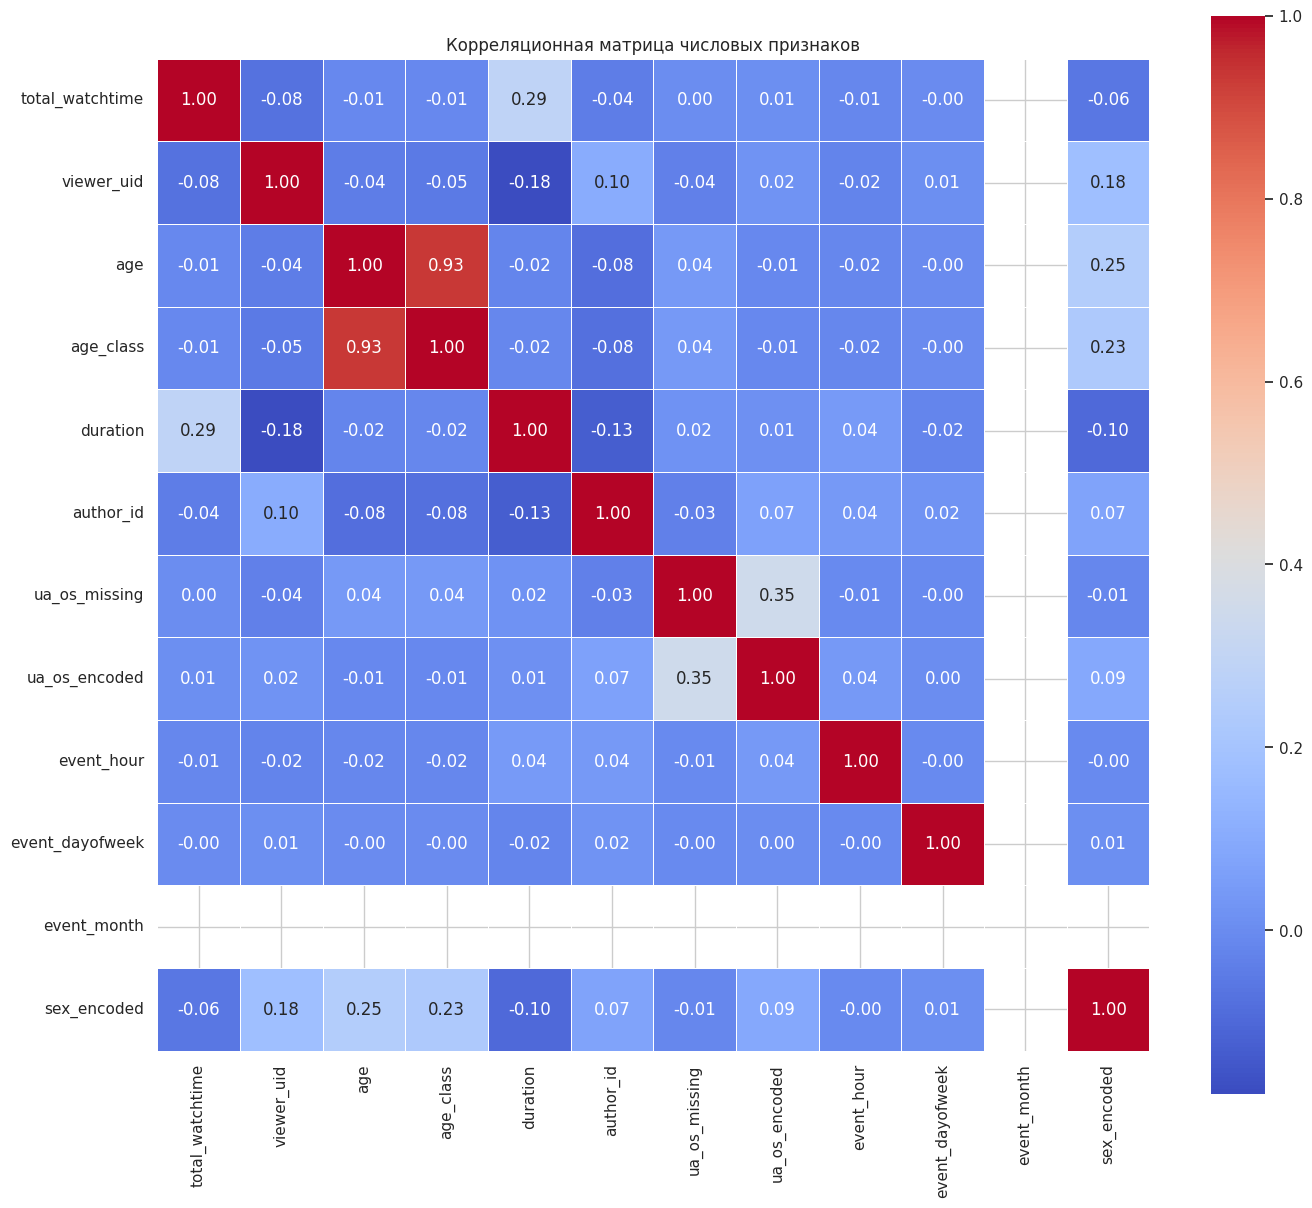

In [61]:
# Вычисляем корреляционную матрицу
corr_matrix = corr_data_numeric.corr()

# Отображаем корреляционную матрицу с помощью тепловой карты
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Корреляционная матрица числовых признаков')
plt.show()


In [62]:
print("Уникальные значения в 'age_range':", train_data['age_range'].unique())


Уникальные значения в 'age_range': ['9-20' '31-40' '21-30' '41-60']


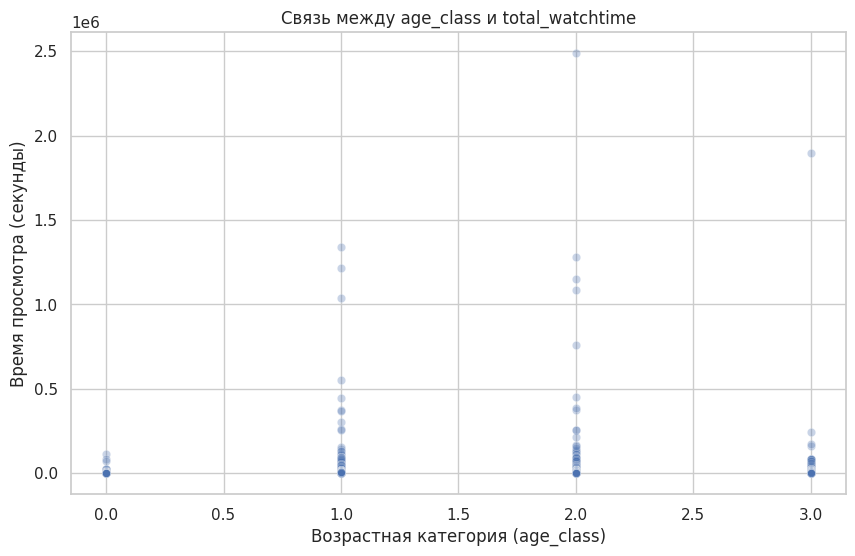

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='age_class', y='total_watchtime', alpha=0.3)
plt.title('Связь между age_class и total_watchtime')
plt.xlabel('Возрастная категория (age_class)')
plt.ylabel('Время просмотра (секунды)')
plt.show()


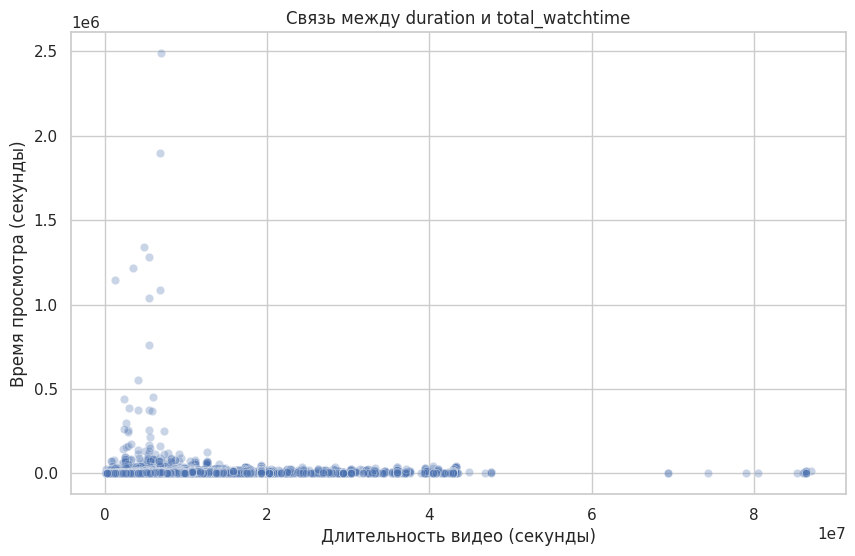

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='duration', y='total_watchtime', alpha=0.3)
plt.title('Связь между duration и total_watchtime')
plt.xlabel('Длительность видео (секунды)')
plt.ylabel('Время просмотра (секунды)')
plt.show()


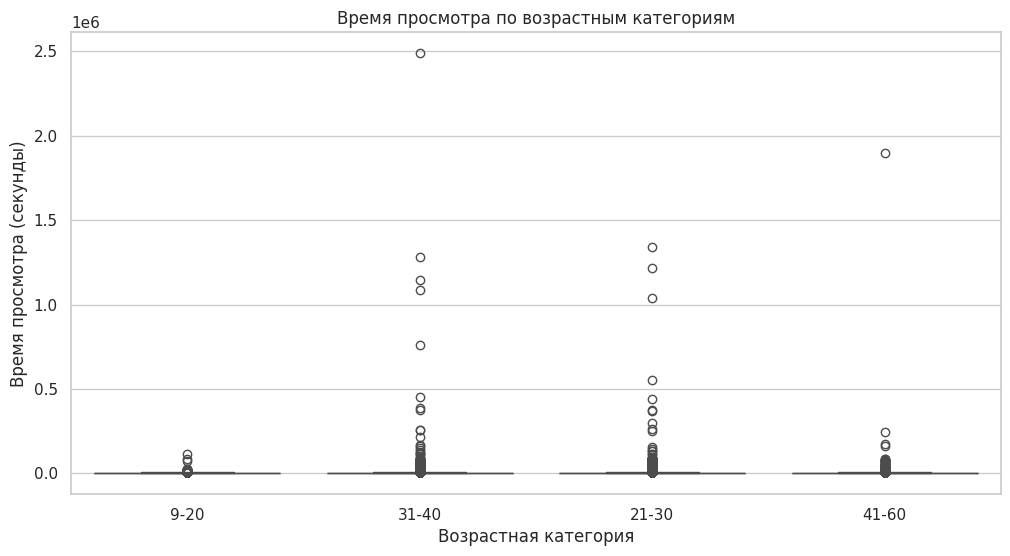

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_range', y='total_watchtime', data=train_data)
plt.title('Время просмотра по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Время просмотра (секунды)')
plt.show()


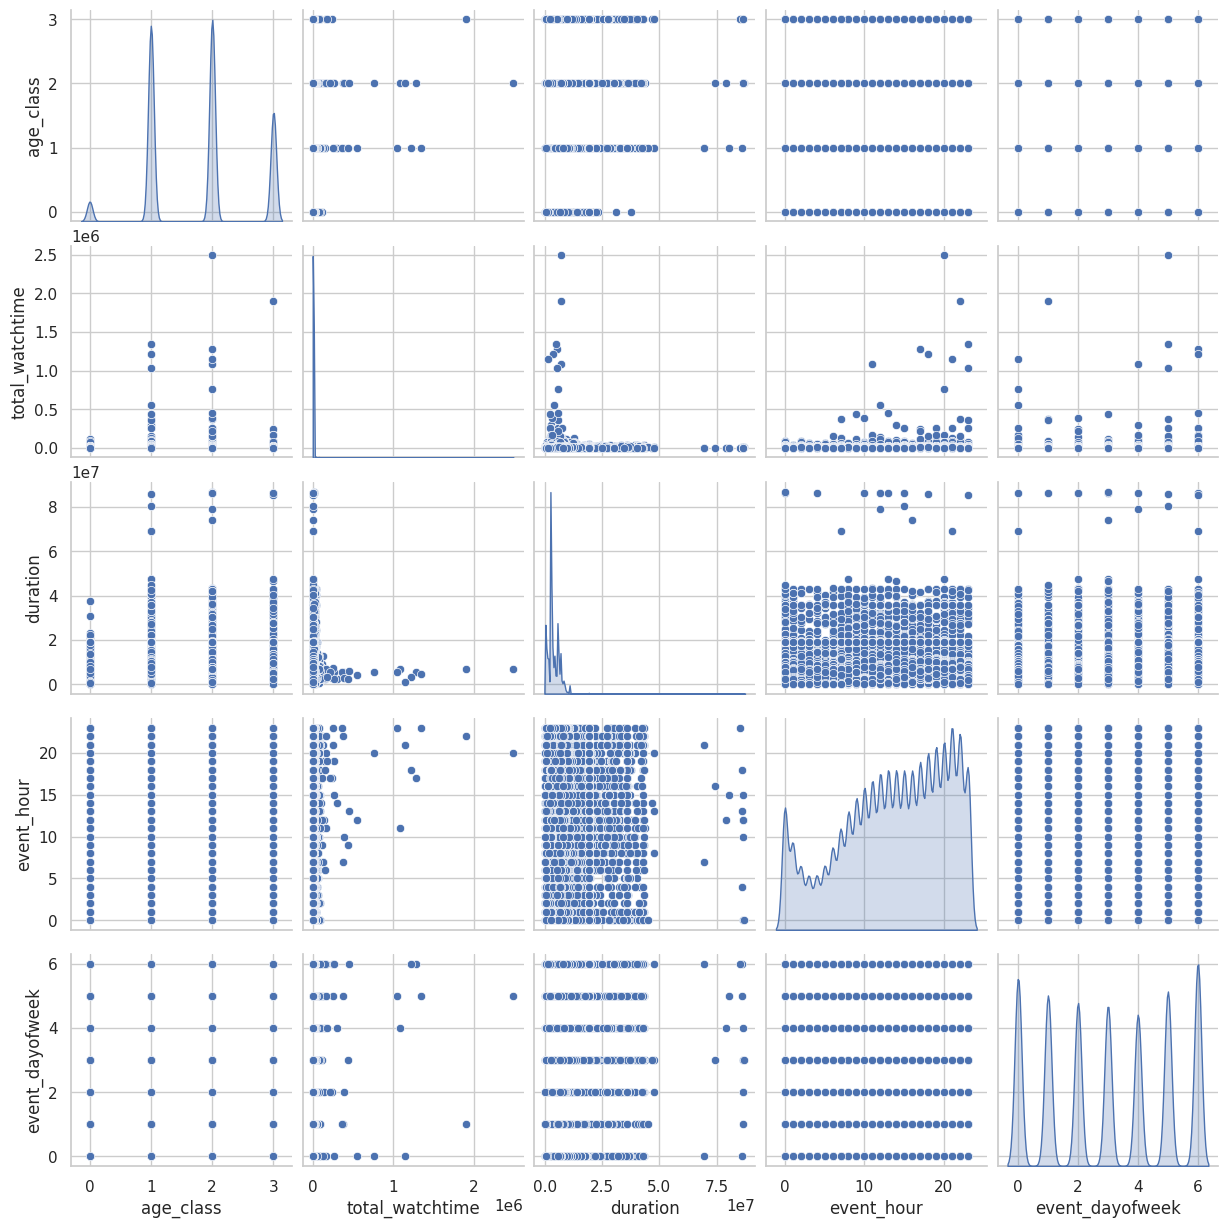

In [66]:
sns.pairplot(train_data[['age_class', 'total_watchtime', 'duration', 'event_hour', 'event_dayofweek']], diag_kind='kde')
plt.show()
